## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import xgboost as xgb
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from math import log
warnings.filterwarnings("ignore")

## Processing functions

In [ ]:
def process(df_list, author_df):
    avgs = {}
    for feature in author_df.columns:
        print(feature)
        if isinstance(author_df[feature].iloc[0], (int, float, np.int64, np.float64)) and not np.isnan(author_df[feature].iloc[0]):
            author_df['avg ' + feature] = author_df.groupby('author')[feature].mean().mean()
            avgs[feature] = dict(zip(author_df['author'], author_df['avg ' + feature]))

    url_engagement = author_df[["shared_url_domain", "engagement"]]
    grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'),)
    urls = dict(zip(grouped.index, grouped["engagement"]))
    author_df["url engagement"] = author_df["shared_url_domain"].map(urls)

    for df in df_list:
      for feature, avg_feature in avgs.items():
          df["avg " + feature] = df["author"].map(avg_feature)
          if feature != "engagement":
              df["dev " + feature] = np.minimum(df[feature] / df["avg " + feature], 999999)
      df["url engagement"] = df["shared_url_domain"].map(urls)

    return df_list, author_df

def pca_process(train_df, test_df):
    V = ["V" + str(i) for i in range(1, 1025)]

    X = train_df[V]
    X_test = test_df[V]

    pca = PCA(1)
    X_pca = pca.fit_transform(X)
    X_pca_test = pca.transform(X_test)

    pca_df = pd.DataFrame(X_pca, columns=["PC" + str(i) for i in range(np.shape(X_pca)[1])])
    pca_df_test = pd.DataFrame(X_pca_test, columns=["PC" + str(i) for i in range(np.shape(X_pca_test)[1])])

    prc_train_df = pd.concat([train_df, pca_df], axis=1)
    prc_test_df = pd.concat([test_df, pca_df_test], axis=1)

    return prc_train_df, prc_test_df

## Load

In [ ]:
author_df = pd.read_csv("authorData.csv")
train_df  = pd.read_csv("train.csv")
test_df   = pd.read_csv("test.csv")

## Process

In [ ]:
[prc_train_df, prc_test_df], prc_author_df = process([train_df, test_df], author_df)
prc_train_df, prc_test_df = pca_process(prc_train_df, prc_test_df)

engagement
timestamp
language
feature1
feature2
followers
author
word_count
shared_url_count
shared_url_domain
is_reply
is_retweet
contains_video
contains_image


In [ ]:
prc_train_df = prc_train_df.drop(columns=["V" + str(i) for i in range(1, 1025)])
prc_test_df = prc_test_df.drop(columns=["V" + str(i) for i in range(1, 1025)])

In [ ]:
author_df = prc_author_df
train_df  = prc_train_df
test_df   = prc_test_df

from datetime import datetime

train_df['timestamp'] = (train_df['timestamp']/1000).apply(lambda x: datetime.fromtimestamp(x))
test_df['timestamp'] = (test_df['timestamp']/1000).apply(lambda x: datetime.fromtimestamp(x))

train_df['year'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').year)
train_df['month'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').month)
train_df['day'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').day)
train_df['hour'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').hour)
train_df['minute'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').minute)
train_df['second'] = train_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').second)

test_df['year'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').year)
test_df['month'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').month)
test_df['day'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').day)
test_df['hour'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').hour)
test_df['minute'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').minute)
test_df['second'] = test_df['timestamp'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S.%f').second)

train_df['log_followers'] = train_df['followers'].apply(lambda x: log(1+x))
test_df['log_followers'] = test_df['followers'].apply(lambda x: log(1+x))
train_df['word_count_60'] = train_df['word_count'].apply(lambda x: 1 if x<60 else 0)
test_df['word_count_60'] = test_df['word_count'].apply(lambda x: 1 if x<60 else 0)

In [ ]:
temp_df = pd.concat([author_df,train_df.iloc[:, 0:13]])

Average_author_engagement = temp_df.groupby('author')['engagement'].mean()
Std_author_engagement = temp_df.groupby('author')['engagement'].std()
Median_author_engagement = temp_df.groupby('author')['engagement'].median()
Min_author_engagement = temp_df.groupby('author')['engagement'].min()
Max_author_engagement = temp_df.groupby('author')['engagement'].max()

Average_author_word_count = temp_df.groupby('author')['word_count'].mean()
Std_author_word_count = temp_df.groupby('author')['word_count'].std()
Median_author_word_count = temp_df.groupby('author')['word_count'].median()
Min_author_word_count = temp_df.groupby('author')['word_count'].min()
Max_author_word_count = temp_df.groupby('author')['word_count'].max()

Average_number_followers = temp_df['followers'].mean()
Std_number_followers = temp_df['followers'].std()
Median_number_followers = temp_df['followers'].median()
Min_number_followers = temp_df['followers'].min()
Max_number_followers = temp_df['followers'].max()

Average_Word_count_mean_engagement = temp_df.groupby('word_count')['engagement'].mean()
Std_Word_count_mean_engagement = temp_df.groupby('word_count')['engagement'].std()
Median_Word_count_mean_engagement = temp_df.groupby('word_count')['engagement'].median()
Min_Word_count_mean_engagement = temp_df.groupby('word_count')['engagement'].min()
Max_Word_count_mean_engagement = temp_df.groupby('word_count')['engagement'].max()

train_df['Average_Word_count_mean_engagement'] = train_df['word_count'].apply(lambda x: Average_Word_count_mean_engagement[x])
test_df['Average_Word_count_mean_engagement'] = test_df['word_count'].apply(lambda x: Average_Word_count_mean_engagement[x] if x in Average_Word_count_mean_engagement.index else np.nan)
train_df['Std_Word_count_mean_engagement'] = train_df['word_count'].apply(lambda x: Std_Word_count_mean_engagement[x])
test_df['Std_Word_count_mean_engagement'] = test_df['word_count'].apply(lambda x: Std_Word_count_mean_engagement[x] if x in Std_Word_count_mean_engagement.index else np.nan)
train_df['Median_Word_count_mean_engagement'] = train_df['word_count'].apply(lambda x: Median_Word_count_mean_engagement[x])
test_df['Median_Word_count_mean_engagement'] = test_df['word_count'].apply(lambda x: Median_Word_count_mean_engagement[x] if x in Median_Word_count_mean_engagement.index else np.nan)
train_df['Min_Word_count_mean_engagement'] = train_df['word_count'].apply(lambda x: Min_Word_count_mean_engagement[x])
test_df['Min_Word_count_mean_engagement'] = test_df['word_count'].apply(lambda x: Min_Word_count_mean_engagement[x] if x in Min_Word_count_mean_engagement.index else np.nan)
train_df['Max_Word_count_mean_engagement'] = train_df['word_count'].apply(lambda x: Max_Word_count_mean_engagement[x])
test_df['Max_Word_count_mean_engagement'] = test_df['word_count'].apply(lambda x: Max_Word_count_mean_engagement[x] if x in Max_Word_count_mean_engagement.index else np.nan)

train_df['Average_author_engagement'] = train_df['author'].apply(lambda x: Average_author_engagement[x])
test_df['Average_author_engagement'] = test_df['author'].apply(lambda x: Average_author_engagement[x] if x in Average_author_engagement.index else np.nan)
train_df['Std_author_engagement'] = train_df['author'].apply(lambda x: Std_author_engagement[x])
test_df['Std_author_engagement'] = test_df['author'].apply(lambda x: Std_author_engagement[x] if x in Std_author_engagement.index else np.nan)
train_df['Median_author_engagement'] = train_df['author'].apply(lambda x: Median_author_engagement[x])
test_df['Median_author_engagement'] = test_df['author'].apply(lambda x: Median_author_engagement[x] if x in Median_author_engagement.index else np.nan)
train_df['Min_author_engagement'] = train_df['author'].apply(lambda x: Min_author_engagement[x])
test_df['Min_author_engagement'] = test_df['author'].apply(lambda x: Min_author_engagement[x] if x in Min_author_engagement.index else np.nan)
train_df['Max_author_engagement'] = train_df['author'].apply(lambda x: Max_author_engagement[x])
test_df['Max_author_engagement'] = test_df['author'].apply(lambda x: Max_author_engagement[x] if x in Max_author_engagement.index else np.nan)

train_df['Average_author_word_count'] = train_df['author'].apply(lambda x: Average_author_word_count[x])
test_df['Average_author_word_count'] = test_df['author'].apply(lambda x: Average_author_word_count[x] if x in Average_author_word_count.index else np.nan)
train_df['Std_author_word_count'] = train_df['author'].apply(lambda x: Std_author_word_count[x])
test_df['Std_author_word_count'] = test_df['author'].apply(lambda x: Std_author_word_count[x] if x in Std_author_word_count.index else np.nan)
train_df['Median_author_word_count'] = train_df['author'].apply(lambda x: Median_author_word_count[x])
test_df['Median_author_word_count'] = test_df['author'].apply(lambda x: Median_author_word_count[x] if x in Median_author_word_count.index else np.nan)
train_df['Min_author_word_count'] = train_df['author'].apply(lambda x: Min_author_word_count[x])
test_df['Min_author_word_count'] = test_df['author'].apply(lambda x: Min_author_word_count[x] if x in Min_author_word_count.index else np.nan)
train_df['Max_author_word_count'] = train_df['author'].apply(lambda x: Max_author_word_count[x])
test_df['Max_author_word_count'] = test_df['author'].apply(lambda x: Max_author_word_count[x] if x in Max_author_word_count.index else np.nan)

train_df['Average_number_followers'] = temp_df['followers'].mean()
test_df['Average_number_followers'] = temp_df['followers'].mean()
train_df['Std_number_followers'] = temp_df['followers'].std()
test_df['Std_number_followers'] = temp_df['followers'].std()
train_df['Std_number_followers'] = temp_df['followers'].median()
test_df['Std_number_followers'] = temp_df['followers'].median()
train_df['Min_number_followers'] = temp_df['followers'].min()
test_df['Min_number_followers'] = temp_df['followers'].min()
train_df['Max_number_followers'] = temp_df['followers'].max()
test_df['Max_number_followers'] = temp_df['followers'].max()

train_df['log_followers'] = train_df['followers'].apply(lambda x: log(1+x))
test_df['log_followers'] = test_df['followers'].apply(lambda x: log(1+x))

## Imports

In [ ]:
# author_df["log engagement"] = np.log(1 + author_df["engagement"])
# train_df["log engagement"] = np.log(1 + train_df["engagement"])
# num_features = ['engagement', 'timestamp', 'feature1', 'feature2', 'followers',
#        'author', 'word_count', 'shared_url_count', 'shared_url_domain',
#        'is_reply', 'is_retweet', 'contains_video', 'contains_image',
#        'avg engagement', 'avg timestamp', 'dev timestamp', 'avg feature1',
#        'dev feature1', 'dev feature2', 'avg followers', 'dev followers',
#        'dev word_count', 'dev shared_url_count', 'url engagement', 'month',
#        'day', 'hour', 'minute', 'second', 'log_followers', 'word_count_60',
#        'log engagement']

# correlation_matrix = train_df.corr()

# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(12, 9))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
mask = ~author_df["shared_url_domain"].isna()
url_engagement = author_df[mask][["shared_url_domain", "engagement"]]
grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'),count=('engagement', 'count'))
grouped.sort_values(by="engagement").tail(30)

,engagement,count
shared_url_domain,,
http://businessinsider.de/,1992.348485,198
http://bbc.co.uk/,2228.454545,198
http://papermag.com/,2258.220000,100
http://eonline.com/,2293.150538,186
http://gleam.io/,2296.303797,158
http://sky.com/,2453.181818,99
http://theatlantic.com/,2459.448630,292
http://thedailybeast.com/,2725.336683,199
http://nypost.com/,2944.892256,297


In [ ]:
url_engagement = author_df[["shared_url_domain", "engagement"]]
grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'),)
urls = dict(zip(grouped.index, grouped["engagement"]))
train_df["url discrepancy"] = train_df["avg engagement"] - train_df["url engagement"]
test_df["url discrepancy"] = test_df["avg engagement"] - test_df["url engagement"]

In [ ]:
train_df = train_df.drop(columns=['month','second','language', 'year', 'avg feature2', 'avg word_count', 'avg shared_url_count',
                                  'is_retweet','avg feature1','avg engagement','Average_number_followers','Std_number_followers','Min_number_followers',
                                  'Max_number_followers','avg timestamp','avg followers','word_count_60','Min_Word_count_mean_engagement'])
test_df = test_df.drop(columns=['month','second','language', 'year', 'avg feature2', 'avg word_count', 'avg shared_url_count',
                                'is_retweet','avg feature1','avg engagement','Average_number_followers','Std_number_followers','Min_number_followers',
                                'Max_number_followers','avg timestamp','avg followers','word_count_60','Min_Word_count_mean_engagement'])

In [ ]:
# Separate features and target variable
X_train = train_df.drop(columns=['timestamp','engagement'])
y_train = train_df['engagement']
X_test = test_df.drop(columns=['timestamp'])

# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=1,include_bias=False)
# pt = PowerTransformer(method='yeo-johnson')
# columns_change = X_train.select_dtypes(include=['float']).columns

# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
# X_train = X_train.fillna(X_train.mode())
# X_test = X_test.fillna(X_test.mode())

# X_train[columns_change] = pt.fit_transform(X_train[columns_change])
# X_test[columns_change] = pt.transform(X_test[columns_change])

# int_columns = X_train.select_dtypes(include=[np.int]).columns
# for column in int_columns:
#   X_train[column] = X_train[column].astype(float)
#   try:
#     X_test[column] = X_test[column].astype(float)
#   except:
#     None

# X_train = poly.fit_transform(X_train[columns_change])
# X_test = poly.transform(X_test[columns_change])

cat_columns = X_train.select_dtypes(include=[np.object]).columns
for column in cat_columns:
  X_train[column] = X_train[column].astype('category')
  X_test[column] = X_test[column].astype('category')

In [ ]:
['Std_author_engagement','author']

In [ ]:
# Get feature importances
model_features = xgb.XGBRegressor(task_type="GPU", random_state=100,objective='reg:squarederror',
                                  colsample_bytree=0.8,learning_rate=0.025,max_depth=2,n_estimators=90,
                                  reg_alpha=2.0,reg_lambda=2.0,subsample=0.8,enable_categorical=True)
model_features.fit(X_train, y_train)
feature_importances = model_features.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print feature importances
print('\nFeature Importances:')
print(feature_importance_df)


Feature Importances:
                               Feature  Importance
27               Std_author_engagement    0.286763
3                               author    0.215088
28            Median_author_engagement    0.145626
30               Max_author_engagement    0.126910
29               Min_author_engagement    0.080143
2                            followers    0.062672
10                       dev timestamp    0.053478
7                             is_reply    0.029321
23      Std_Word_count_mean_engagement    0.000000
24   Median_Word_count_mean_engagement    0.000000
25      Max_Word_count_mean_engagement    0.000000
26           Average_author_engagement    0.000000
0                             feature1    0.000000
21                       log_followers    0.000000
31           Average_author_word_count    0.000000
32               Std_author_word_count    0.000000
33            Median_author_word_count    0.000000
34               Min_author_word_count    0.000000
35       

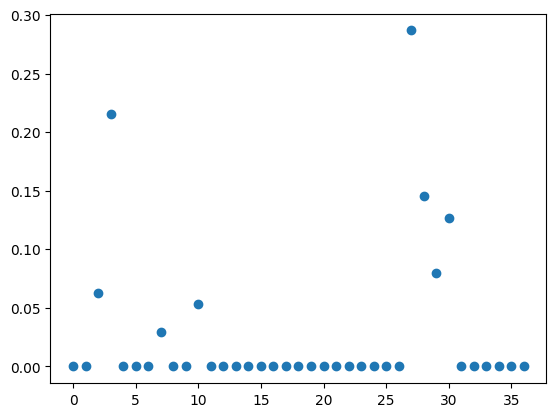

In [ ]:
plt.scatter(range(len(feature_importances)),feature_importances)

In [ ]:
# # XGB
# # np.linspace(0.001,0.013,10)
# model = xgb.XGBRegressor(task_type="GPU", random_state=100,objective='reg:squarederror',enable_categorical=True)
# param_grid = [{'n_estimators':[100,500,1000], 'learning_rate':np.linspace(0.001,0.1,3), 'max_depth':[4], 'subsample':np.linspace(0.1,1,3),
#                'colsample_bytree':np.linspace(0.1,1,3), 'reg_alpha':np.linspace(0.1,2,3), 'reg_lambda':np.linspace(0.1,2,3)}]
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
# model_grid = grid_search.fit(X_train, y_train)
# print(model_grid.best_params_)
# print(grid_search.best_score_)

# predictions = model_grid.predict(X_test.drop(columns='Id'))
# predictions = [max(element,0) for element in predictions]
# final_submission = pd.DataFrame({'Id': test_df['Id'], "engagement":predictions})
# final_submission['Id'] = final_submission['Id'].astype('int')
# from google.colab import files
# final_submission.to_csv('Benjamin Cohen - M2 Proba-Finance 2023.csv',header=['Id',"engagement"],index=False)
# files.download('Benjamin Cohen - M2 Proba-Finance 2023.csv')

In [ ]:
# # XGB
# # np.linspace(0.001,0.013,10)
# model = xgb.XGBRegressor(task_type="GPU", random_state=100,objective='reg:squarederror',enable_categorical=True)
# param_grid = [{'n_estimators':[1000], 'learning_rate':np.linspace(0.001,0.1,1), 'max_depth':[4], 'subsample':np.linspace(0.1,1,1),
#                'colsample_bytree':np.linspace(0.1,1,1), 'reg_alpha':np.linspace(0.1,2,1), 'reg_lambda':np.linspace(0.1,2,1)}]
# grid_search = GridSearchCV(model, param_grid, cv=2, scoring='neg_root_mean_squared_error')
# model_grid = grid_search.fit(X_train, y_train)
# print(model_grid.best_params_)
# print(grid_search.best_score_)

In [ ]:
# train_df["prediction"] = model_grid.predict(X)

# train_df["SE"] = (train_df["engagement"] - train_df["prediction"]) ** 2
# train_df["E"]  = train_df["prediction"] - train_df["engagement"]
# train_df["avg followers"].describe()

In [ ]:
# # Get feature importances
# feature_importances = regressor.feature_importances_
# # Create a DataFrame to store feature names and their importances
# feature_importance_df = pd.DataFrame({'Feature': X.columns,'Importance': feature_importances})
# # Sort the DataFrame by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# # Print feature importances
# print('\nFeature Importances:')
# print(feature_importance_df)

In [ ]:
# predictions = model_grid.predict(X_test)
# predictions = [max(element,0) for element in predictions]
# final_submission = pd.DataFrame({'Id': test_df['Id'], "engagement":predictions})
# final_submission['Id'] = final_submission['Id'].astype('int')
# from google.colab import files
# final_submission.to_csv('Benjamin Cohen - M2 Proba-Finance 2023.csv',header=['Id',"engagement"],index=False)
# files.download('Benjamin Cohen - M2 Proba-Finance 2023.csv')

In [ ]:
# predictions = model_grid.predict(X_test)
# predictions = [max(element,0) for element in predictions]
# final_submission = pd.DataFrame({'Id': test_df['Id'], "engagement":predictions})
# final_submission['Id'] = final_submission['Id'].astype('int')
# from google.colab import files
# final_submission.to_csv('Essai.csv',header=['Id',"engagement"],index=False)
# files.download('Essai.csv')

In [ ]:
predictions = model_features.predict(X_test.drop(columns='Id'))
predictions = [max(element,0) for element in predictions]
final_submission = pd.DataFrame({'Id': test_df['Id'], "engagement":predictions})
final_submission['Id'] = final_submission['Id'].astype('int')
from google.colab import files
final_submission.to_csv('Benjamin Cohen - M2 Proba-Finance 2023.csv',header=['Id',"engagement"],index=False)
files.download('Benjamin Cohen - M2 Proba-Finance 2023.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from sklearn.preprocessing import PowerTransformer
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2,include_bias=False)
# pt = PowerTransformer(method='yeo-johnson')
# columns_change = X_train.select_dtypes(include=['float']).columns

# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
# X_train = X_train.fillna(X_train.mode())
# X_test = X_test.fillna(X_test.mode())

# X_train[columns_change] = pt.fit_transform(X_train[columns_change])
# X_test[columns_change] = pt.transform(X_test[columns_change])

# int_columns = X_train.select_dtypes(include=[np.int]).columns
# for column in int_columns:
#   X_train[column] = X_train[column].astype(float)
#   try:
#     X_test[column] = X_test[column].astype(float)
#   except:
#     None

# X_train = poly.fit_transform(X_train[columns_change])
# X_test = poly.transform(X_test[columns_change])

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import xgboost as xgb
# from sklearn.decomposition import PCA
# from sklearn.metrics import mean_squared_error, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier
# from datetime import datetime
# from sklearn.impute import SimpleImputer

# def process(df_list, author_df):
#     avgs = {}
#     for feature in author_df.columns:
#         print(feature)
#         if isinstance(author_df[feature].iloc[0], (int, float, np.int64, np.float64)) and not np.isnan(author_df[feature].iloc[0]):
#             author_df['avg_' + feature] = author_df.groupby('author')[feature].transform('mean')
#             avgs[feature] = dict(zip(author_df['author'], author_df['avg_' + feature]))

#     # Calculate aggregated engagement at the author level
#     author_df['avg_engagement'] = author_df.groupby('author')['engagement'].transform('mean')

#     url_engagement = author_df[["shared_url_domain", "engagement"]]
#     grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'))
#     urls = dict(zip(grouped.index, grouped["engagement"]))
#     author_df["url_engagement"] = author_df["shared_url_domain"].map(urls)

#     for df in df_list:
#         for feature, avg_feature in avgs.items():
#             df["avg_" + feature] = df["author"].map(avg_feature)
#             if feature != "engagement":
#                 df["dev_" + feature] = np.minimum(df[feature] / df["avg_" + feature], 999999)
#         df["url_engagement"] = df["shared_url_domain"].map(urls)

#     return df_list, author_df

# def pca_process(train_df, test_df):
#     V = ["V" + str(i) for i in range(1, 1025)]

#     X = train_df[V]
#     X_test = test_df[V]

#     pca = PCA(n_components=1)
#     X_pca = pca.fit_transform(X)
#     X_pca_test = pca.transform(X_test)

#     pca_df = pd.DataFrame(X_pca, columns=["PC" + str(i) for i in range(np.shape(X_pca)[1])])
#     pca_df_test = pd.DataFrame(X_pca_test, columns=["PC" + str(i) for i in range(np.shape(X_pca_test)[1])])

#     prc_train_df = pd.concat([train_df, pca_df], axis=1)
#     prc_test_df = pd.concat([test_df, pca_df_test], axis=1)

#     return prc_train_df, prc_test_df


# prc_train_df = pd.read_csv('train.csv')
# prc_test_df = pd.read_csv('test.csv')
# prc_author_df = pd.read_csv('authorData.csv')

# [prc_train_df, prc_test_df], prc_author_df = process([prc_train_df, prc_test_df], prc_author_df)
# prc_train_df, prc_test_df = pca_process(prc_train_df, prc_test_df)

# prc_train_df['timestamp'] = (prc_train_df['timestamp']/1000).apply(lambda x: datetime.fromtimestamp(x))
# prc_test_df['timestamp'] = (prc_test_df['timestamp']/1000).apply(lambda x: datetime.fromtimestamp(x))

# # Extract datetime features
# for df in [prc_train_df, prc_test_df]:
#     df['year'] = df['timestamp'].dt.year
#     df['month'] = df['timestamp'].dt.month
#     df['day'] = df['timestamp'].dt.day
#     df['hour'] = df['timestamp'].dt.hour
#     df['minute'] = df['timestamp'].dt.minute
#     df['second'] = df['timestamp'].dt.second

# # Additional feature engineering
# for df in [prc_train_df, prc_test_df]:
#     df['log_followers'] = np.log1p(df['followers'])
#     df['word_count_60'] = np.where(df['word_count'] < 60, 1, 0)

# # Drop timestamp column
# prc_train_df = prc_train_df.drop(columns='timestamp')
# prc_test_df = prc_test_df.drop(columns='timestamp')

# temp_df = pd.concat([prc_author_df, prc_train_df.iloc[:, 0:13]])

# # Calculating aggregated features
# agg_features = {
#     'engagement': ['mean', 'std', 'median', 'min', 'max'],
#     'word_count': ['mean', 'std', 'median', 'min', 'max'],
#     'followers': ['mean', 'std', 'median', 'min', 'max']
# }

# author_aggregated = temp_df.groupby('author').agg(agg_features).reset_index()

# # Renaming columns for easy merging
# author_aggregated.columns = ['author'] + [f'{col[0]}_{col[1]}' for col in author_aggregated.columns[1:]]

# prc_train_df = pd.merge(prc_train_df, author_aggregated, on='author', how='left')
# prc_test_df = pd.merge(prc_test_df, author_aggregated, on='author', how='left')

# # Calculate engagement discrepancy with shared URL domain
# mask = ~prc_author_df["shared_url_domain"].isna()
# url_engagement = prc_author_df[mask][["shared_url_domain", "engagement"]]
# grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'), count=('engagement', 'count'))
# grouped.sort_values(by="engagement").tail(30)

# url_engagement = prc_author_df[["shared_url_domain", "engagement"]]
# grouped = url_engagement.groupby("shared_url_domain").agg(engagement=('engagement', 'mean'))
# urls = dict(zip(grouped.index, grouped["engagement"]))

# prc_train_df["url_discrepancy"] = prc_train_df["avg_engagement"] - prc_train_df["shared_url_domain"].map(urls)
# prc_test_df["url_discrepancy"] = prc_test_df["avg_engagement"] - prc_test_df["shared_url_domain"].map(urls)

# # Provided Data
# # Use the provided data: prc_train_df, prc_test_df, prc_author_df

# # Sample Feature Engineering (Replace with your actual feature engineering)
# prc_train_df['log_followers'] = np.log1p(prc_train_df['followers'])
# prc_test_df['log_followers'] = np.log1p(prc_test_df['followers'])
# prc_train_df['word_count_60'] = np.where(prc_train_df['word_count'] < 60, 1, 0)
# prc_test_df['word_count_60'] = np.where(prc_test_df['word_count'] < 60, 1, 0)

# # Drop timestamp column
# # prc_train_df = prc_train_df.drop(columns='timestamp')
# # prc_test_df = prc_test_df.drop(columns='timestamp')

# # Additional Feature Engineering (Replace with your actual feature engineering)
# prc_train_df['follower_word_ratio'] = prc_train_df['followers'] / prc_train_df['word_count']
# prc_test_df['follower_word_ratio'] = prc_test_df['followers'] / prc_test_df['word_count']

# # Train-Test Split
# X_train, X_val, y_train, y_val = train_test_split(
#     prc_train_df.drop('engagement', axis=1),
#     prc_train_df['engagement'],
#     test_size=0.2,
#     random_state=42
# )

# # Model Training
# numeric_features = ['followers', 'word_count', 'follower_word_ratio']
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_features = ['language', 'shared_url_domain', 'author']
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features),
#         # add other transformers if needed for additional features
#     ]
# )

# model = xgb.XGBRegressor(tree_method='gpu_hist', random_state=42,enable_categorical=True)

# pca = PCA(n_components=50)
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('pca', pca),
#     ('regressor', model)
# ])

# # Grid Search for Hyperparameter Tuning (Replace with your actual grid search)
# param_grid = {
#     'regressor__n_estimators': [100, 200],
#     'regressor__max_depth': [3, 5, 7],
#     'regressor__learning_rate': [0.01, 0.1, 0.2],
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# X_train = X_train.fillna(X_train.median())
# X_train = X_train.fillna('NotHere')
# X_train['shared_url_domain'] = X_train['shared_url_domain'].astype(str)
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_

# # Model Evaluation
# val_predictions = best_model.predict(X_val)
# rmse = mean_squared_error(y_val, val_predictions, squared=False)
# print(f'Validation RMSE: {rmse}')

# # Prediction on Test Set
# test_predictions = best_model.predict(prc_test_df)

# # Submission
# submission_df = pd.DataFrame({
#     'tweet_id': prc_test_df['tweet_id'],
#     'engagement': test_predictions
# })
# submission_df.to_csv('submission.csv', index=False)


engagement
timestamp
language
feature1
feature2
followers
author
word_count
shared_url_count
shared_url_domain
is_reply
is_retweet
contains_video
contains_image


ValueError: ignored

In [ ]:
# sum(pd.read_csv('train.csv')['engagement']<int(1e5))

3947

In [ ]:
# X_train.describe()

,feature1,feature2,followers,word_count,shared_url_count,V1,V2,V3,V4,V5,...,word_count_median,word_count_min,word_count_max,followers_mean,followers_std,followers_median,followers_min,followers_max,url_discrepancy,follower_word_ratio
count,3323.000000,3323.000000,3.323000e+03,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,...,3323.000000,3323.000000,3323.000000,3.323000e+03,3323.000000,3.323000e+03,3.323000e+03,3.323000e+03,3323.000000,3323.000000
mean,66.541378,-0.376166,6.880781e+05,19.191694,0.131508,0.011409,0.000951,0.011244,0.013154,0.009948,...,16.460126,2.568462,47.932591,6.864438e+05,1823.594539,6.869651e+05,6.811292e+05,6.882777e+05,38.808063,inf
std,37.474298,3.599025,4.849889e+06,13.473578,0.444219,0.010923,0.003902,0.017131,0.013901,0.009241,...,9.361662,3.280357,12.917826,4.845486e+06,10637.017241,4.848121e+06,4.826016e+06,4.850801e+06,780.167368,NaN
min,0.000000,-5.000000,0.000000e+00,0.000000,0.000000,-0.006150,-0.002177,-0.014520,-0.004261,-0.025661,...,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-6205.496272,0.000000
25%,30.000000,-5.000000,7.795000e+02,9.000000,0.000000,0.003053,-0.000026,0.000426,0.003346,0.003651,...,10.000000,1.000000,43.000000,7.075525e+02,8.028384,7.010000e+02,6.170000e+02,7.925000e+02,0.000000,53.219231
50%,84.000000,0.000000,5.008000e+03,15.000000,0.000000,0.009250,-0.000009,0.004936,0.008803,0.009223,...,13.500000,2.000000,51.000000,4.668690e+03,74.467615,4.683000e+03,4.208000e+03,5.021000e+03,0.000000,355.444444
75%,100.000000,0.000000,4.862250e+04,27.000000,0.000000,0.017124,0.000106,0.016607,0.018458,0.015158,...,20.500000,3.000000,55.000000,4.739280e+04,576.201028,4.735400e+04,4.424200e+04,4.865900e+04,0.000000,3257.545455
max,100.000000,5.000000,9.350486e+07,66.000000,4.000000,0.059283,0.080929,0.239115,0.092428,0.057207,...,57.000000,45.000000,129.000000,9.348830e+07,426376.023548,9.350249e+07,9.334403e+07,9.350917e+07,22220.331024,inf
